In [1]:
import torch #main frame work we used to perform high dimension tensor calculation
import torch.nn as nn #this class we used to define Custom Neural Network Architecture
from torch.utils.data import Dataset,DataLoader #this Dataset class we used split the entire data into chunks based on Batch_sizes
#where as DataLoader class we used to load data and perform action over it.

from sklearn.model_selection import train_test_split #this class we used to split the data into train or test sets
from sklearn.preprocessing import StandardScaler,MinMaxScaler 
#above this class used to do input scaling so that variance of all field would be same for models

import pandas as pd
from cloudpickle import pickle #this class we used to convert datastructure into bytes stream
import seaborn as sb #to see the visualization.

In [2]:
#if i want to show gpu is avilable or not in system.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

### Now Loading Dataset and doing EDA over it

In [3]:
data = pd.read_csv(filepath_or_buffer="insurance.csv",encoding="utf-8")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


### step:1 checking for Null value

In [4]:
100 * data.isnull().sum()/data.shape[0] 

age               0.0
sex               0.0
bmi               0.0
children          0.0
smoker            0.0
region            0.0
charges           0.0
insuranceclaim    0.0
dtype: float64

### step:2 checking for duplicated record

In [5]:
data.duplicated().sum()

1

In [6]:
#to see which records showing duplicacy
data[data.duplicated()]

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
581,19,1,30.59,0,0,1,1639.5631,1


In [7]:
#dropping those duplocate records from data.
data.drop_duplicates(keep="first",inplace=True,ignore_index=True)

In [8]:
#again checking duplicated record deleted or not.
data.duplicated().sum()

0

### step:3 checking for target variable

In [9]:
data.insuranceclaim.value_counts(normalize=True,ascending=False,dropna=False) #both the classes are balanced in data.

insuranceclaim
1    0.584892
0    0.415108
Name: proportion, dtype: float64

### step:4 splitting the data into training set or testing set

In [10]:
#selecting input and output variable
x = data.drop(labels="insuranceclaim",axis=1)
y = data["insuranceclaim"]

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y) 
#stratify ensure both class distribution goes same to both sets(train or test)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1069, 7), (268, 7), (1069,), (268,))

In [12]:
#to show the dtype and dimension of train test split data
print(f"Training set dimension: {x_train.ndim} and Testing set dimension: {x_test.ndim}")
print(f"Training set dtype:   {x_train.dtypes} and Testing set dtype: {x_test.dtypes}")
print(f"Training set type:   {type(x_train)} and Testing set type: {type(x_test)}")

Training set dimension: 2 and Testing set dimension: 2
Training set dtype:   age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object and Testing set dtype: age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object
Training set type:   <class 'pandas.core.frame.DataFrame'> and Testing set type: <class 'pandas.core.frame.DataFrame'>


```
| Task Type                                | Input dtype     | Target dtype    | Loss Function          |
| ---------------------------------------- | --------------- | --------------- | ---------------------- |
| **Binary Classification (Sigmoid)**      | `torch.float32` | `torch.float32` | `nn.BCEWithLogitsLoss` |
| **Multi-class Classification (Softmax)** | `torch.float32` | `torch.long`    | `nn.CrossEntropyLoss`  |


```

In [13]:
x_train.head()

,age,sex,bmi,children,smoker,region,charges
1290,19,1,34.900,0,1,3,34828.65400
359,18,0,20.790,0,0,2,1607.51010
579,25,0,23.465,0,0,0,3206.49135
662,18,1,33.660,0,0,2,1136.39940
1167,32,1,35.200,2,0,3,4670.64000


In [14]:
y_train.head()

1290    1
359     0
579     0
662     1
1167    0
Name: insuranceclaim, dtype: int64

### step:5 now doing input scaling converting into numpy object

In [15]:
#creating an object of standardscaler class.
ss = StandardScaler()

#now applying scaling on input data.
x_train_ss = ss.fit_transform(x_train.astype("float32")) #converting dataframe 2d object to 2d numpy object
x_test_ss  = ss.transform(x_test.astype("float32"))      #Transforming testing dataframe 2d object to 2d numpy object
print(f"Training set dimension: {x_train_ss.ndim}  and Testing set dimension: {x_test_ss.ndim}")
print(f"Training set dtype:     {x_train_ss.dtype} and Testing set dtype: {x_test_ss.dtype}")
print(f"Training set type:      {type(x_train_ss)} and Testing set type: {type(x_test_ss)}")

Training set dimension: 2  and Testing set dimension: 2
Training set dtype:     float32 and Testing set dtype: float32
Training set type:      <class 'numpy.ndarray'> and Testing set type: <class 'numpy.ndarray'>


In [16]:
#converting target variable set to numpy object.
import numpy as np
y_train_np = np.array(object=y_train,dtype=np.float32)
y_test_np = np.array(object=y_test,dtype=np.float32)
print(f"Training set dimension: {y_train_np.ndim} and Testing set dimension: {y_test_np.ndim}")
print(f"Training set type:   {type(y_train_np)} and Testing set type: {type(y_test_np)}")

Training set dimension: 1 and Testing set dimension: 1
Training set type:   <class 'numpy.ndarray'> and Testing set type: <class 'numpy.ndarray'>


### step:6 converting numpy object to tensor object

In [17]:
x_train_tensor = torch.from_numpy(x_train_ss)
x_test_tensor = torch.from_numpy(x_test_ss)
y_train_tensor = torch.from_numpy(y_train_np)
y_test_tensor = torch.from_numpy(y_test_np)
print(f"Training set tensor: {type(x_train_tensor)} and Testing set tensor: {type(x_test_tensor)}")

Training set tensor: <class 'torch.Tensor'> and Testing set tensor: <class 'torch.Tensor'>


In [18]:
x_train_tensor,y_train_tensor

(tensor([[-1.4381,  0.9879,  0.7013,  ...,  2.0106,  1.3720,  1.8369],
         [-1.5094, -1.0122, -1.6309,  ..., -0.4974,  0.4717, -0.9687],
         [-1.0101, -1.0122, -1.1888,  ..., -0.4974, -1.3291, -0.8337],
         ...,
         [-0.8675,  0.9879, -0.2491,  ...,  2.0106,  0.4717,  0.4365],
         [ 1.0582, -1.0122,  0.3343,  ..., -0.4974, -1.3291, -0.1819],
         [ 0.3450, -1.0122,  0.2781,  ..., -0.4974,  0.4717, -0.4598]]),
 tensor([1., 0., 0.,  ..., 1., 1., 1.]))

### step:7 using custom dataset class to split into chuks based on batch_size

In [19]:
class CustomDataset(Dataset):
    #defining the constructor method to initialize instance variable
    def __init__(self,input_data,output_data):
        self.input_data  = input_data
        self.output_data = output_data
        
    #to see the shape of input data we used special method
    def __len__(self):
        return len(self.input_data)
    
    #to split the data into chunks based on batch_size
    def __getitem__(self, index):
        return self.input_data[index],self.output_data[index]

### step:8 getting training dataset or tesing dataset

In [20]:
#creating an object of CustomDataset class.
training_dataset = CustomDataset(input_data=x_train_tensor,output_data=y_train_tensor)
testing_dataset  = CustomDataset(input_data=x_test_tensor,output_data=y_test_tensor)


### step:9 converting training or testing dataset into dataloader object that split chunks based on batch_size

In [21]:
training_dataloader   = DataLoader(dataset=training_dataset,batch_size=16,shuffle=True,pin_memory=True)
testing_dataloader = DataLoader(dataset=testing_dataset,batch_size=16,shuffle=True,pin_memory=True)

In [22]:
for feature,label in testing_dataloader:
    print(feature)
    print(label)
    break

tensor([[-1.4381, -1.0122, -1.3458, -0.9008, -0.4974, -0.4287, -0.9257],
        [ 0.9869, -1.0122, -0.6706, -0.9008, -0.4974, -0.4287, -0.2299],
        [ 0.5590, -1.0122, -1.0838, -0.0707, -0.4974,  1.3720,  1.1113],
        [ 1.0582,  0.9879,  1.6376,  1.5896,  2.0106, -1.3291,  2.9957],
        [-1.2954,  0.9879,  0.0732, -0.9008, -0.4974,  1.3720, -0.9756],
        [-0.4395,  0.9879,  0.7583, -0.9008, -0.4974, -1.3291, -0.0568],
        [ 0.2737,  0.9879, -0.0896,  1.5896, -0.4974, -0.4287, -0.3942],
        [ 1.2009, -1.0122,  1.5145, -0.9008, -0.4974,  0.4717, -0.1678],
        [-1.2241, -1.0122,  0.6484,  0.7595, -0.4974, -1.3291, -0.7729],
        [ 0.1310,  0.9879,  1.5872, -0.9008, -0.4974,  0.4717, -0.6223],
        [-0.4395,  0.9879, -0.5293,  0.7595, -0.4974, -0.4287, -0.6601],
        [-0.4395,  0.9879, -1.3144, -0.9008, -0.4974, -0.4287,  0.7522],
        [ 1.5575,  0.9879, -1.1574, -0.9008, -0.4974, -1.3291,  0.0044],
        [ 0.9869, -1.0122, -0.4227,  1.5896, -0.497

In [23]:
for feature,label in training_dataloader:
    print(feature)
    print(label)
    break

tensor([[ 0.5590,  0.9879,  0.9145, -0.9008,  2.0106,  0.4717,  2.4152],
        [-0.2256, -1.0122, -0.1219, -0.0707, -0.4974,  0.4717, -0.6418],
        [ 0.0597,  0.9879,  0.5699, -0.0707, -0.4974, -1.3291, -0.5471],
        [-0.9388,  0.9879, -2.1466, -0.9008, -0.4974, -0.4287, -0.8781],
        [ 0.7016,  0.9879,  1.1327,  0.7595, -0.4974,  0.4717, -0.3187],
        [-1.0101,  0.9879, -0.7334, -0.9008, -0.4974, -1.3291, -0.8747],
        [ 0.4876,  0.9879, -1.3813, -0.9008, -0.4974,  1.3720, -0.5009],
        [-0.8675, -1.0122, -0.0425,  1.5896, -0.4974, -0.4287,  0.4837],
        [-1.2954,  0.9879,  1.0236, -0.9008, -0.4974,  0.4717, -0.9749],
        [-1.1528, -1.0122, -0.4194, -0.9008, -0.4974, -0.4287, -0.8773],
        [ 0.2024, -1.0122,  1.7632, -0.0707, -0.4974, -1.3291, -0.4583],
        [ 1.2009,  0.9879, -1.7698, -0.9008,  2.0106, -1.3291,  0.7884],
        [-0.2256, -1.0122, -1.4086,  1.5896, -0.4974, -1.3291, -0.4940],
        [-1.5094,  0.9879,  0.7508, -0.0707, -0.497

### step:10 now defining deep neural network Architecture

In [24]:
import torch.nn.init as init
class SimpleNeuralNetworkArchitecture(nn.Module):
    #defining the instance variable 
    def __init__(self,input_size,output_size):
        
        #using super method to all inherit property from parent class.
        super().__init__()
        
        #defining linear and non linear layer in Hidden layer.
        self.linear1 = nn.Linear(in_features=input_size,out_features=128)  #first hidden layer
        self.batchnorm1 = nn.BatchNorm1d(num_features=128) #batch normalization we apply only over hiddens layer
        self.relu1 =  nn.ReLU()
        self.dropout1 = nn.Dropout(p=0.3)
        
        
        self.linear2 = nn.Linear(in_features=128,out_features=64)          #second hidden layer
        self.batchnorm2 = nn.BatchNorm1d(num_features=64) #batch normalization we apply only over hiddens layer
        self.relu2 =  nn.ReLU()
        self.dropout2 = nn.Dropout(p=0.3)
        
        self.linear3 = nn.Linear(in_features=64,out_features=16)           #third hidden layer
        self.batchnorm3 = nn.BatchNorm1d(num_features=16) #batch normalization we apply only over hiddens layer
        self.relu3 =  nn.ReLU()
        self.dropout3 = nn.Dropout(p=0.3)
        
        self.linear4 = nn.Linear(in_features=16,out_features=output_size)  # output layer
        
        #calling the Initialize weights and biases method
        self._init_weights()
        
        
        
    #now initializing the weight and bias before starting the training using xavier and glorat or he maining
    #i will used relu in hidden layer or sigmoid output layer
    
    def _init_weights(self):
        #Hidden layers → ReLU → He Normal.
        init.kaiming_normal_(self.linear1.weight,nonlinearity="relu") #inplace operation updating directly
        init.zeros_(self.linear1.bias)
        
        #Hidden layers2 → ReLU → He Normal.
        init.kaiming_normal_(self.linear2.weight,nonlinearity="relu")
        init.zeros_(self.linear2.bias)
        
        #Hidden layers3 → ReLU → He Normal.
        init.kaiming_normal_(self.linear3.weight,nonlinearity="relu")
        init.zeros_(self.linear3.bias)
        
        #output layers → sigmoid → xavier or glorat uniform.
        init.xavier_uniform_(self.linear4.weight)
        init.zeros_(self.linear4.bias)
        
    #whenever we started training first algortithm work in neural network forward pass
    def forward(self, x): #where x is input feature data
        #first hidden layer
        x = self.linear1(x)    #passing the batch input data to neural network 
        x = self.batchnorm1(x) #after getting linear out we do batch normalization so that variance will be comparable
        x = self.relu1(x)      #applying nonlinearity by Activation function
        x = self.dropout1(x)   #randomly selected node making deactivate at time of training
        
        #second hidden layer
        x = self.linear2(x)    #passing the batch input data to neural network 
        x = self.batchnorm2(x) #after getting linear out we do batch normalization so that variance will be comparable
        x = self.relu2(x)      #applying nonlinearity by Activation function
        x = self.dropout2(x)   #randomly selected node making deactivate at time of training
        
        
        #third hidden layer
        x = self.linear3(x)    #passing the batch input data to neural network 
        x = self.batchnorm3(x) #after getting linear out we do batch normalization so that variance will be comparable
        x = self.relu3(x)      #applying nonlinearity by Activation function
        x = self.dropout3(x)   #randomly selected node making deactivate at time of training
        
        #output layer
        x = torch.sigmoid(self.linear4(x))
        return x

In [25]:
x_train_tensor.shape,x_train_tensor.shape[1]

(torch.Size([1069, 7]), 7)

### calling the neural network architecture class

In [26]:
#now creating an object of Custom neural network class
model = SimpleNeuralNetworkArchitecture(input_size=x_train_tensor.shape[1],output_size=1).to(device=device)
model

SimpleNeuralNetworkArchitecture(
  (linear1): Linear(in_features=7, out_features=128, bias=True)
  (batchnorm1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (dropout1): Dropout(p=0.3, inplace=False)
  (linear2): Linear(in_features=128, out_features=64, bias=True)
  (batchnorm2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu2): ReLU()
  (dropout2): Dropout(p=0.3, inplace=False)
  (linear3): Linear(in_features=64, out_features=16, bias=True)
  (batchnorm3): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): ReLU()
  (dropout3): Dropout(p=0.3, inplace=False)
  (linear4): Linear(in_features=16, out_features=1, bias=True)
)

### to show the summary of model how many trainiable parameter need to be trained

In [27]:
#if i want to see how many trainable parameter need to be trained by this model
from torchinfo import summary
summary(model)

Layer (type:depth-idx)                   Param #
SimpleNeuralNetworkArchitecture          --
├─Linear: 1-1                            1,024
├─BatchNorm1d: 1-2                       256
├─ReLU: 1-3                              --
├─Dropout: 1-4                           --
├─Linear: 1-5                            8,256
├─BatchNorm1d: 1-6                       128
├─ReLU: 1-7                              --
├─Dropout: 1-8                           --
├─Linear: 1-9                            1,040
├─BatchNorm1d: 1-10                      32
├─ReLU: 1-11                             --
├─Dropout: 1-12                          --
├─Linear: 1-13                           17
Total params: 10,753
Trainable params: 10,753
Non-trainable params: 0

#### step:11) defining the loss function and type of optimizer will used at time of training

In [28]:
#target are binary classifier so loss function binary cross entropy.
loss_fxn = nn.BCELoss() #calculate loss value

#optimizers i am using Adam they will updates the trainable parameter effectively in each layer.
optimizer = torch.optim.Adam(params=model.parameters(),lr=0.0001,weight_decay=0.001) 
#weight_decay means l2 regularization we apply is technique to prevent the model from overfitting
#and reducing weight to zero

### applying early stopping to stop the iteration whenever model get overfitted

In [29]:
# EarlyStopping variables
best_loss = np.inf         # abhi tak ka sabse best (minimum) test loss
patience_counter = 0       # kitne epochs ho gaye bina improvement ke
patience = 5               # agar 5 epoch tak test loss improve nahi hota to stop

### step:12) Now starting the models

In [30]:
epochs=100
training_loss_lst = []
testing_loss_lst = []
for i in range(epochs):
    #performing model training
    model.train()
    training_running_loss_count = 0
    
    #based on batchsize data record we are passing to neural network architecture.
    for feature,label in training_dataloader:
        feature = feature.to(device)
        label   = label.to(device)
        
        #whenever we start training the model first algorithm work is forward propogation
        pred_output = model.forward(feature)
        #print(f"actual output shape: {label.shape}")
        #print(f"predicted output shape: {pred_output.shape}")
        
        #calculating the loss value by using Loss fxns or evaluating the performance of model at time of training.
        loss_value = loss_fxn(pred_output.squeeze(1),label)
        
        #now updating the training_running_loss_count variable
        training_running_loss_count = training_running_loss_count+loss_value.item() 
        #this item method we used to get value from shape of tensor
        
        #before applying backpropogation to the loss value first we have to clear the gradient inside optimizers
        optimizer.zero_grad()
        
        #reducing the loss value by using backpropogation algorithm and calcualting gradient of loss wrt to trainable parameter
        loss_value.backward()
        
        #using optimizers updating the tainable parameters
        optimizer.step()
        
    avg_training_loss = (training_running_loss_count)/(len(training_dataloader))
    training_loss_lst.append(avg_training_loss)

    
    #performing model testing(on testing we dont apply any backpropogation,overfitting technique,early stopping)
    model.eval()
    testing_running_loss_count = 0
    
    with torch.no_grad(): #at time of testing or inferencing gradient tracking is off
        #based on batchsize data record we are passing to neural network architecture.
        for feature,label in testing_dataloader:
            feature = feature.to(device)
            label   = label.to(device)
            
            #whenever we start training the model first algorithm work is forward propogation
            pred_output = model.forward(feature)
            
            #calculating the loss value by using Loss fxns or evaluating the performance of model at time of training.
            loss_value = loss_fxn(pred_output.squeeze(1),label)
            
            #updating the count of loss in testing_running_loss_count
            testing_running_loss_count = testing_running_loss_count+loss_value.item()
            
        avg_testing_loss = (testing_running_loss_count)/(len(testing_dataloader))
        testing_loss_lst.append(avg_testing_loss)
            
    print(f"Epoch [{i+1}/{epochs}], "
          f"Train Loss: {avg_training_loss:.4f}, "
          f"Test Loss: {avg_testing_loss:.4f}, "
          )
    
    
    # ---------------- EARLY STOPPING + CHECKPOINT ----------------
    if avg_testing_loss < best_loss:
        # Agar test loss improve ho gaya hai
        best_loss = avg_testing_loss
        patience_counter = 0  # reset patience
        torch.save(model.state_dict(), "best_model.pth")  # ModelCheckpoint
        print(f"✅ Model improved. Saved at epoch {i+1} with Test Loss {best_loss:.4f}")
        
    else:
        # Agar test loss improve nahi hua
        patience_counter += 1
        print(f"⚠️ No improvement. Patience counter = {patience_counter}/{patience}")

        if patience_counter >= patience:
            print(f"⏹ Early stopping at epoch {i+1} (best loss = {best_loss:.4f})")
            break

print("Training Finished ✅")   

Epoch [1/100], Train Loss: 0.7334, Test Loss: 0.5749, 
✅ Model improved. Saved at epoch 1 with Test Loss 0.5749
Epoch [2/100], Train Loss: 0.6523, Test Loss: 0.5532, 
✅ Model improved. Saved at epoch 2 with Test Loss 0.5532
Epoch [3/100], Train Loss: 0.6391, Test Loss: 0.5226, 
✅ Model improved. Saved at epoch 3 with Test Loss 0.5226
Epoch [4/100], Train Loss: 0.6004, Test Loss: 0.5120, 
✅ Model improved. Saved at epoch 4 with Test Loss 0.5120
Epoch [5/100], Train Loss: 0.5815, Test Loss: 0.4870, 
✅ Model improved. Saved at epoch 5 with Test Loss 0.4870
Epoch [6/100], Train Loss: 0.5729, Test Loss: 0.4886, 
⚠️ No improvement. Patience counter = 1/5
Epoch [7/100], Train Loss: 0.5500, Test Loss: 0.4697, 
✅ Model improved. Saved at epoch 7 with Test Loss 0.4697
Epoch [8/100], Train Loss: 0.5394, Test Loss: 0.4717, 
⚠️ No improvement. Patience counter = 1/5
Epoch [9/100], Train Loss: 0.5225, Test Loss: 0.4416, 
✅ Model improved. Saved at epoch 9 with Test Loss 0.4416
Epoch [10/100], Train 

### to visualize the training and testing loss

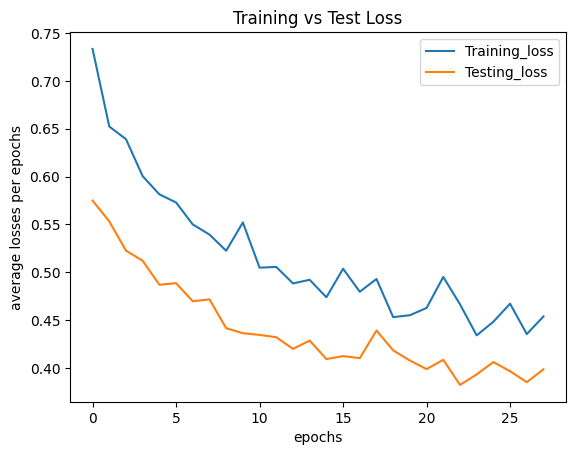

In [31]:
import matplotlib.pyplot as plt
plt.plot(training_loss_lst,label="Training_loss")
plt.plot(testing_loss_lst,label="Testing_loss")
plt.xlabel("epochs")
plt.ylabel("average losses per epochs")
plt.title('Training vs Test Loss')
plt.legend()
plt.show()

### if i want to see what will be save in model

In [32]:
checkpoint = torch.load("best_model.pth")
print(checkpoint.keys())   # layer names

odict_keys(['linear1.weight', 'linear1.bias', 'batchnorm1.weight', 'batchnorm1.bias', 'batchnorm1.running_mean', 'batchnorm1.running_var', 'batchnorm1.num_batches_tracked', 'linear2.weight', 'linear2.bias', 'batchnorm2.weight', 'batchnorm2.bias', 'batchnorm2.running_mean', 'batchnorm2.running_var', 'batchnorm2.num_batches_tracked', 'linear3.weight', 'linear3.bias', 'batchnorm3.weight', 'batchnorm3.bias', 'batchnorm3.running_mean', 'batchnorm3.running_var', 'batchnorm3.num_batches_tracked', 'linear4.weight', 'linear4.bias'])


In [33]:
print(checkpoint["linear1.weight"])   # example linear layer1 ke weights
print(checkpoint["linear1.bias"])     # example linear layer1 ke bias

tensor([[-3.5003e-01, -3.8427e-01, -1.6181e-01,  1.3925e+00, -2.9157e-01,
         -8.1563e-02, -2.3218e-01],
        [ 9.1328e-02, -3.7139e-01, -4.1142e-01, -8.4188e-01, -8.2869e-01,
         -1.1477e-01, -3.7510e-01],
        [-9.2468e-02,  7.1538e-01,  7.6905e-01, -1.5396e+00,  4.7654e-01,
          1.6069e-02, -4.0391e-01],
        [-7.3427e-01, -2.3726e-01, -1.1010e+00, -1.9972e-01, -9.2848e-01,
         -3.3184e-01, -1.8412e-02],
        [-6.6225e-01, -4.7277e-01, -5.1456e-01,  5.6472e-01, -2.8127e-01,
          5.6925e-02, -7.7634e-01],
        [ 2.6421e-01, -3.3714e-01,  1.0529e-01, -2.5670e-01,  4.0379e-02,
          9.5140e-02, -1.0561e+00],
        [ 5.2794e-02, -4.0599e-01,  4.8563e-01,  7.5942e-02,  1.7572e-01,
         -1.4268e-01, -3.1529e-02],
        [-6.5320e-01,  9.0576e-01,  1.0353e+00, -6.6573e-01,  1.0905e+00,
         -1.1901e+00, -1.0086e-01],
        [ 6.7071e-01,  1.0666e+00, -4.3182e-01, -1.7746e-01, -8.9104e-01,
          3.7303e-01, -3.9277e-01],
        [ 

In [34]:
# ✅ To perform inferencing ka flow hamesha yeh hota hai:
# Define model → load weights → eval() mode → input tensor → forward pass → postprocess (sigmoid/softmax).

## Inferencing Prediction

In [35]:
#loading model weights and bias
model.load_state_dict(torch.load("best_model.pth", map_location=device))
model.to(device)   # model GPU/CPU pe

# Ek sample input (7 features)
sample_input = torch.tensor([[0.5, -1.2, 3.4, 0.0, 1.1, -0.7, 2.2]], dtype=torch.float32).to(device)

# Prediction
model.eval()
with torch.no_grad():
    prediction = model(sample_input)
    print("Raw Prediction:", prediction)

Raw Prediction: tensor([[0.9994]], device='cuda:0')
